In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_df, clinical_df, on = "Mouse ID", how = "outer")

# Display the data table for preview
merge_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_avg_df = merge_df.groupby(["Drug", "Timepoint"]).agg({"Tumor Volume (mm3)" : "mean"})
tumor_avg_df.rename(columns = {"Tumor Volume (mm3)": "Mean Tumor Volume"}, inplace = True)

# Convert to DataFrame

# Preview DataFrame
tumor_avg_df.head()

Mean Tumor Volume
Drug      Timepoint                   
Capomulin 0                  45.000000
          5                  44.266086
          10                 43.084291
          15                 42.064317
          20                 40.716325

In [26]:
# # Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# tumor_sem = tumor_avg_df.groupby(["Drug", "Timepoint"]).agg({"Mean Tumor Volume" : "std"})

# # Convert to DataFrame
# tumor_sem_df = tumor_sem.reset_index()
                                                            
# # Preview DataFrame
# tumor_sem_df.head()


Drug       Timepoint
Capomulin  0            8.980674
           5            8.980674
           10           8.980674
           15           8.980674
           20           8.980674
           25           8.980674
           30           8.980674
           35           8.980674
           40           8.980674
           45           8.980674
Ceftamin   0            8.980674
           5            8.980674
           10           8.980674
           15           8.980674
           20           8.980674
           25           8.980674
           30           8.980674
           35           8.980674
           40           8.980674
           45           8.980674
Infubinol  0            8.980674
           5            8.980674
           10           8.980674
           15           8.980674
           20           8.980674
           25           8.980674
           30           8.980674
           35           8.980674
           40           8.980674
           45         

In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumor_sem_df["Drug"].unique()
rows = ["Ceftamin", "Naftisol", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
tumor_by_drug = tumor_sem_df.set_index("Drug").drop(rows).reset_index()

tumor_by_drug = tumor_by_drug.pivot_table(tumor_sem_df, index=["Timepoint"],columns="Drug")

tumor_by_drug = tumor_by_drug.reset_index()
tumor_by_drug = tumor_by_drug.set_index("Timepoint")

# Preview that Reformatting worked

tumor_by_drug.head()

Mean Tumor Volume                                 
Drug              Capomulin  Infubinol   Ketapril    Placebo
Timepoint                                                   
0                 45.000000  45.000000  45.000000  45.000000
5                 44.266086  47.062001  47.389175  47.125589
10                43.084291  49.403909  49.582269  49.423329
15                42.064317  51.296397  52.399974  51.359742
20                40.716325  53.197691  54.920935  54.364417

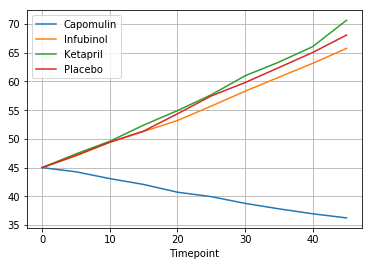

In [5]:
# Generate the Plot (with Error Bars)
drug_ax = tumor_by_drug.plot(kind="line", grid = True)

drug_ax.legend(["Capomulin", "Infubinol", "Ketapril", "Placebo"])
# Save the Figure

In [6]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [9]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [10]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [12]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [13]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [15]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

NameError: name 'fig' is not defined